# Kaggle Dataset Exploration
## San Francisco Government Employees Salaries
### Yen-Ting Chen

This is a data exploration and visualization of the Kaggle dataset - San Francisco Government Employees Salaries.
* [Cleaning data](#cleaning)
* [General overlook](#general)
* [Overtime pay](#overtime)
* [Data by job title](#jobtitle)  
  

In [4]:
library(ggplot2)
library(Rmisc)
library(dplyr)
salaries <- read.csv("Salaries.csv", stringsAsFactors = FALSE)
head(salaries)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,,567595.4,567595.4,2011,NA,San Francisco,
2,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.3,538909.3,2011,NA,San Francisco,
3,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.9,335279.9,2011,NA,San Francisco,
4,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,,332343.6,332343.6,2011,NA,San Francisco,
5,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,,326373.2,326373.2,2011,NA,San Francisco,
6,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.0,8601.0,189082.74,,316285.7,316285.7,2011,NA,San Francisco,


In [5]:
str(salaries)

'data.frame':	148654 obs. of  13 variables:
 $ Id              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ EmployeeName    : chr  "NATHANIEL FORD" "GARY JIMENEZ" "ALBERT PARDINI" "CHRISTOPHER CHONG" ...
 $ JobTitle        : chr  "GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY" "CAPTAIN III (POLICE DEPARTMENT)" "CAPTAIN III (POLICE DEPARTMENT)" "WIRE ROPE CABLE MAINTENANCE MECHANIC" ...
 $ BasePay         : chr  "167411.18" "155966.02" "212739.13" "77916.0" ...
 $ OvertimePay     : chr  "0.0" "245131.88" "106088.18" "56120.71" ...
 $ OtherPay        : chr  "400184.25" "137811.38" "16452.6" "198306.9" ...
 $ Benefits        : chr  "" "" "" "" ...
 $ TotalPay        : num  567595 538909 335280 332344 326373 ...
 $ TotalPayBenefits: num  567595 538909 335280 332344 326373 ...
 $ Year            : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ Notes           : logi  NA NA NA NA NA NA ...
 $ Agency          : chr  "San Francisco" "San Francisco" "San Francisco" "San Francisco" ...
 $ 

--------------------------------------------------------------------------------------------------------------------------------

<a id='cleaning'></a>
## Cleaning Data

`BasePay`, `OvertimePay`, `OtherPay` and `Benefits` should be numerical. Check which cells contain non-numeric characters and convert to NA. Convert all others to numeric.

In [6]:
findNumericFn <- function(content) {
  if (grepl("[^0-9\\.]", content) == TRUE) {
    return(NA)
  }
  return(as.numeric(content))
}

salaries$BasePay <- sapply(salaries$BasePay, findNumericFn)
salaries$OvertimePay <- sapply(salaries$OvertimePay, findNumericFn)
salaries$OtherPay <- sapply(salaries$OtherPay, findNumericFn)
salaries$Benefits <- sapply(salaries$Benefits, findNumericFn)

What date range is this data for?

In [17]:
unique(salaries$Year)

[1] 2011 2012 2013 2014

Checking if there are values other than NA/blank in `Notes` and `Status`, or "San Francisco" in `Agency`:

In [9]:
unique(salaries$Notes)
unique(salaries$Status)
unique(salaries$Agency)

NULL

[1] ""   "PT" "FT"

[1] "San Francisco"

There is no useful information in two of the columns since they only contain one value. Remove `Notes` & `Agency` column.

In [10]:
salaries$Notes <- NULL
salaries$Agency <- NULL

--------------------------------------------------------------------------------------------------------------------------------

<a id='general'></a>
## General Overlooks

In [35]:
unique(salaries[salaries$Status!="",]$Year)

[1] 2014
Levels: 2011 2012 2013 2014

Data in 2011-2013 do not have status full time or part time labeled.  
What percentage of employees in 2014 are full time?

In [20]:
round(sum(salaries$Status=="FT")/sum(salaries$Status!="")*100,2)

[1] 58.59

Only 58.59% of employees in 2014 have full time status.

It is interesting to note that while there are 148650 employee data points, there are up to 110810 unique employee names.  
Of the repeating names, there may be employees who simply have the same name, and not because they occur in several years.  
This seems to indicate that San Francisco employees don't stay at their jobs for too long!

In [67]:
nrow(salaries[salaries$EmployeeName != "Not provided",])
length(unique(salaries[salaries$EmployeeName != "Not provided",2]))

[1] 148650

[1] 110810

Quick look at `TotalPayBenefits`

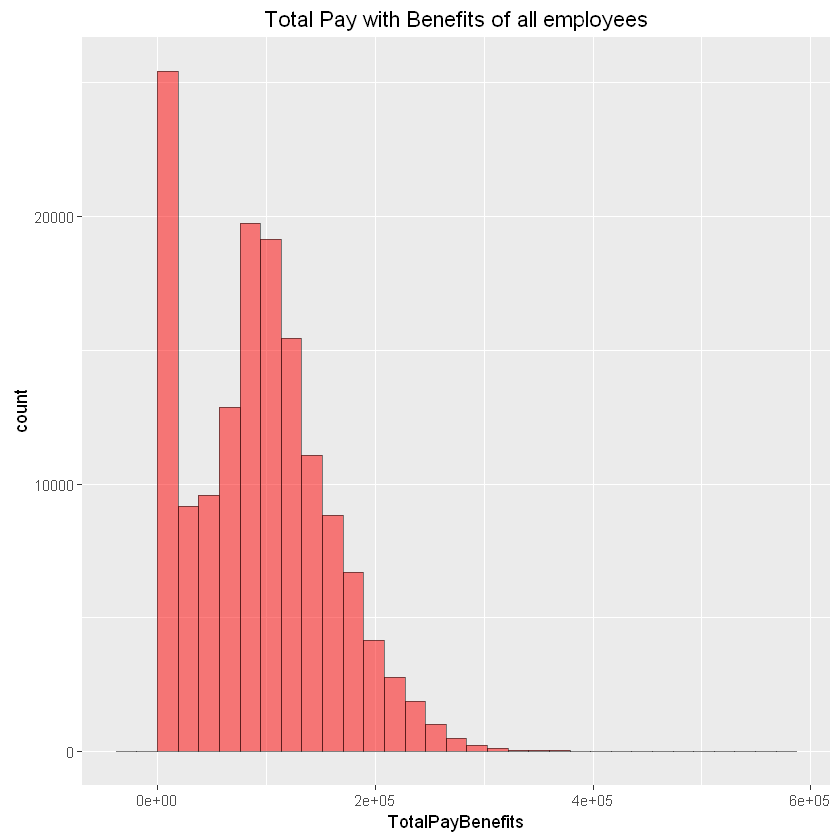

In [21]:
ggplot(salaries, aes(TotalPayBenefits)) + geom_histogram(bins=30, colour="black", fill="red", alpha=0.5) +
    ggtitle("Total Pay with Benefits of all employees")

Who are the employees with `TotalPayBenefits` > 4e5 ?!

In [22]:
salaries[(salaries$TotalPayBenefits > 4e5),]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
1,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.2,0,400184.2,NA,567595.4,567595.4,2011,
2,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245131.9,137811.4,NA,538909.3,538909.3,2011,
36160,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128808.9,220909.5,13126.31,44430.12,362844.7,407274.8,2012,
72926,72926,Gregory P Suhr,Chief of Police,319275,0,20007.06,86533.21,339282.1,425815.3,2013,
72927,72927,Joanne M Hayes-White,"Chief, Fire Department",313686,0,23236,85431.39,336922,422353.4,2013,
72928,72928,Samson Lai,"Battalion Chief, Fire Suppress",186236.4,131217.6,29648.27,57064.95,347102.3,404167.3,2013,
72929,72929,Ellen G Moffatt,Asst Med Examiner,272855.5,23727.91,38954.54,66198.92,335538,401736.9,2013,
110532,110532,David Shinn,Deputy Chief 3,129150,0,342802.6,38780.04,471952.6,510732.7,2014,PT
110533,110533,Amy P Hart,Asst Med Examiner,318835.5,10712.95,60563.54,89540.23,390112,479652.2,2014,FT
110534,110534,William J Coaker Jr.,Chief Investment Officer,257340,0,82313.7,96570.66,339653.7,436224.4,2014,PT


`TotalPayBenefits` of employees in 2014 by status

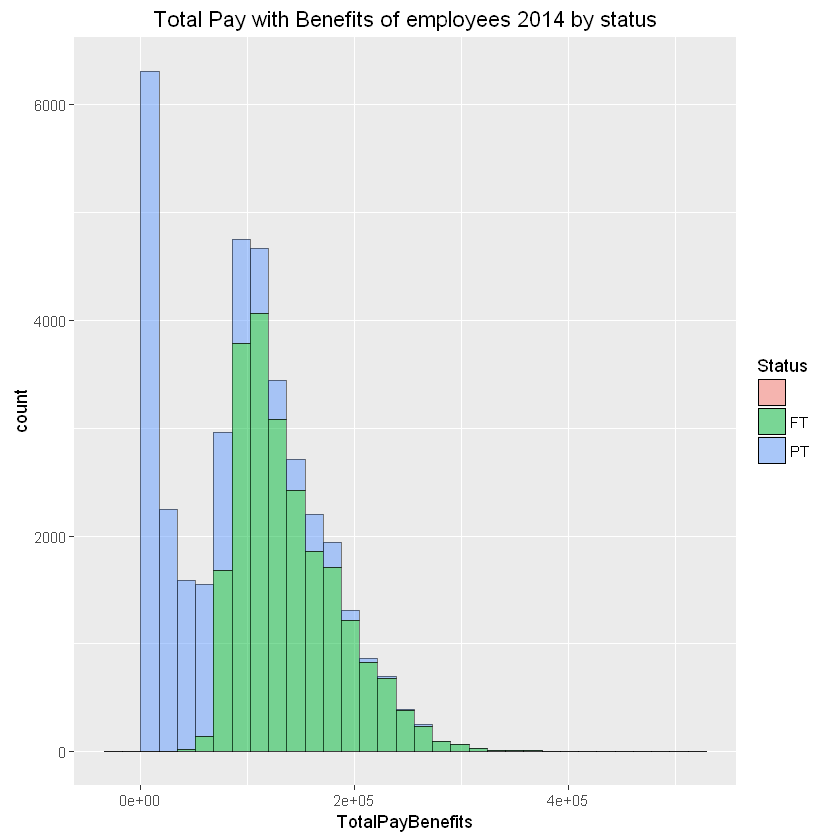

In [25]:
ggplot(salaries[salaries$Year==2014,], aes(TotalPayBenefits, fill = Status)) +
    geom_histogram(bins=30, colour="black", alpha=0.5) +
    ggtitle("Total Pay with Benefits of employees 2014 by status")

Bimodal distribution of total pay appears to be due to status.

`TotalPayBenefits` of employees by year

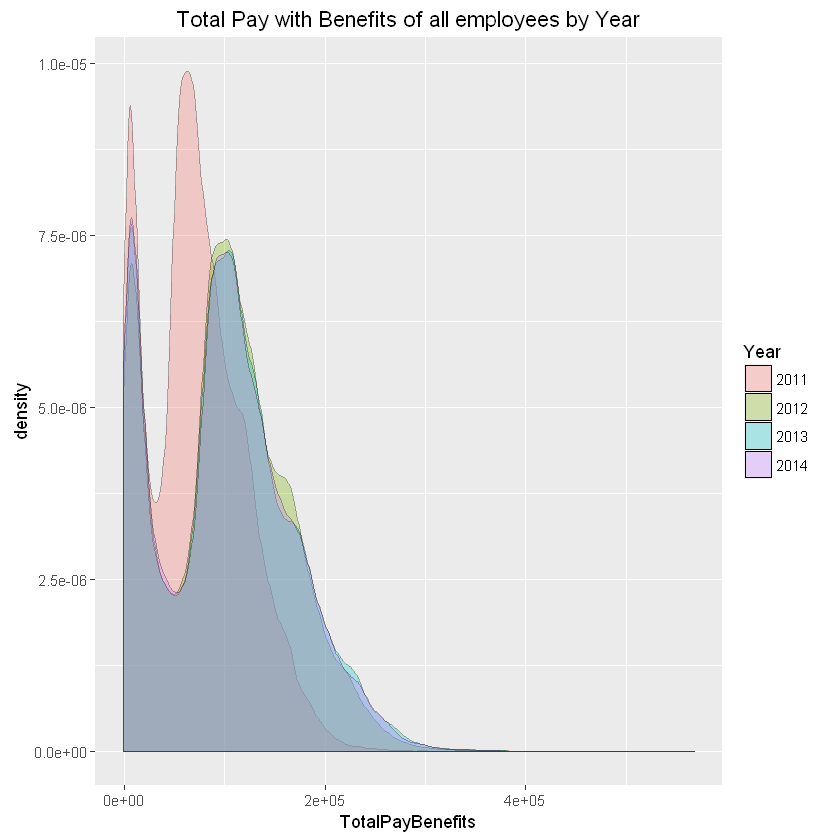

In [36]:
salaries$Year <- as.factor(salaries$Year)
ggplot(salaries, aes(TotalPayBenefits, fill=Year)) + geom_density(alpha=.3) +
  ggtitle("Total Pay with Benefits of all employees by Year")

There seems to a big increase in the percentage of employees receiving higher salaries.  
Judging from the previous figure of salaries by status in 2014, the separate peak close to zero are part time employees.  
Part time employee salaries do not seem to have changed much.  
However, this seems to be due to there being no benefit amounts given in 2011.
Total pay without benefits does not change much over the years.  
This may either be that no benefits were given in 2011, or that they are simply not recorded in this database (and the TotalPayBenefits calculated without them for 2011).

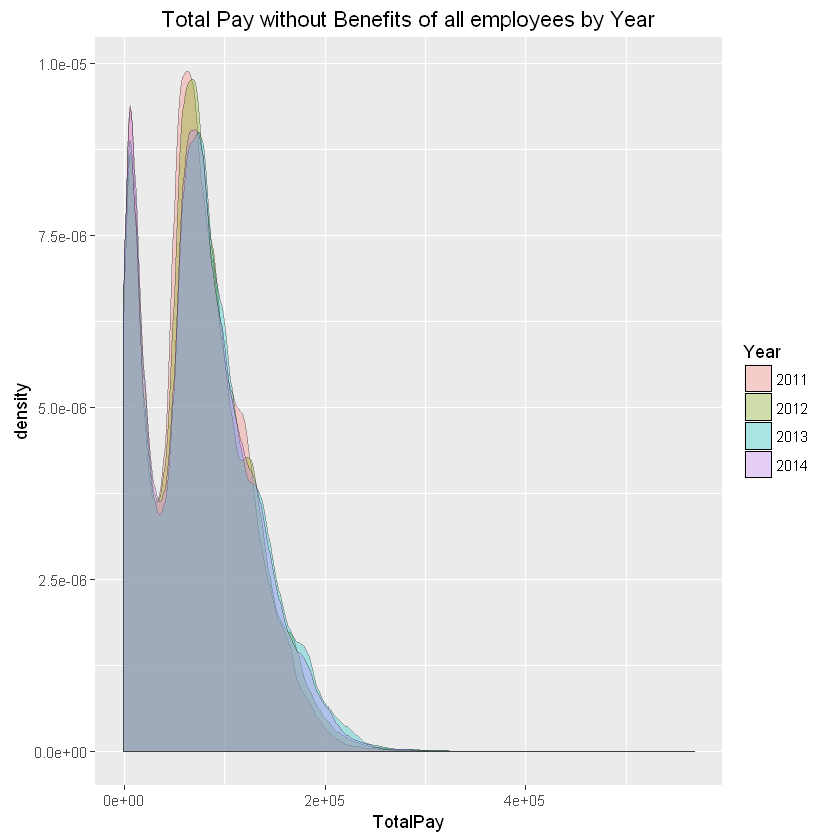

In [37]:
ggplot(salaries, aes(TotalPay, fill=Year)) + geom_density(alpha=.3) +
  ggtitle("Total Pay without Benefits of all employees by Year")

However, base pay does seem to increase slightly from 2011-2013, and decrease slightly again in 2014.

Warning message:
: Removed 620 rows containing non-finite values (stat_density).

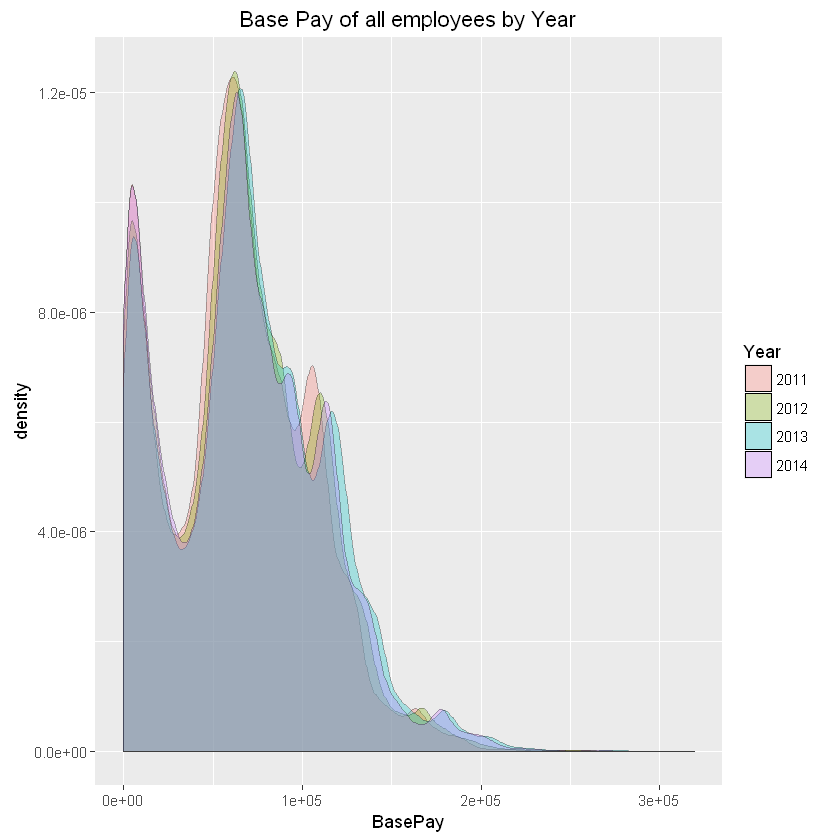

In [45]:
ggplot(salaries, aes(BasePay, fill=Year)) + geom_density(alpha=.3) +
  ggtitle("Base Pay of all employees by Year")

Looking at averages by year:  
(Note there is one bar missing for average benefits in 2011, since none are given)

Warning message:
: Removed 1 rows containing missing values (position_stack).

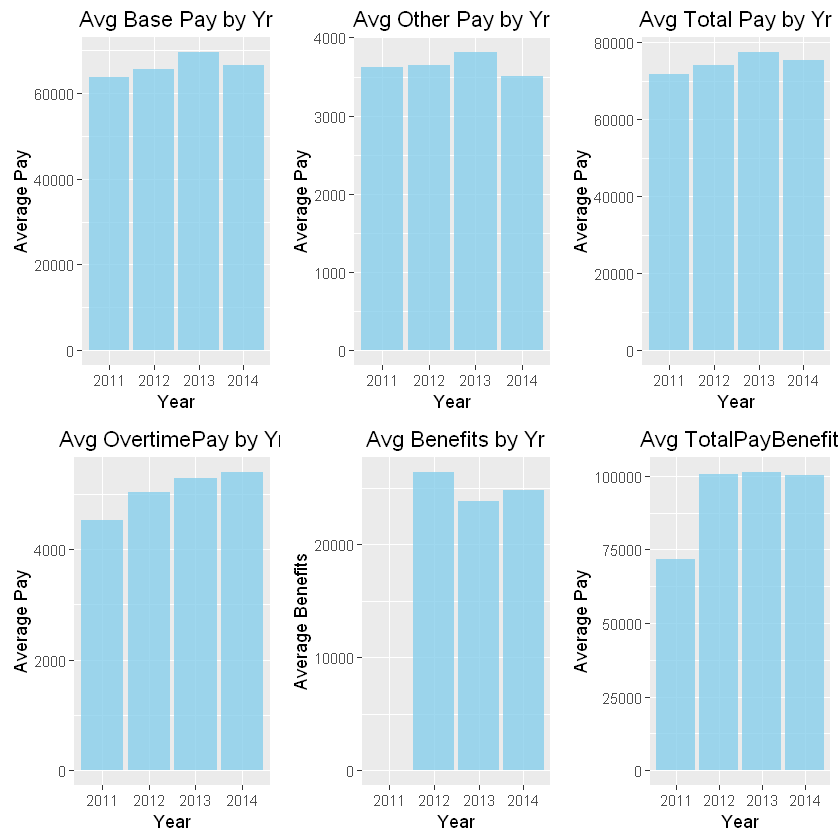

In [44]:
avgBasePay <- salaries %>% group_by(Year) %>% summarize(avgBasePay=mean(BasePay, na.rm=TRUE))
avgOvertimePay <- salaries %>% group_by(Year) %>% summarize(avgOvertimePay=mean(OvertimePay, na.rm=TRUE))
avgOtherPay <- salaries %>% group_by(Year) %>% summarize(avgOtherPay=mean(OtherPay, na.rm=TRUE))
avgBenefits <- salaries %>% group_by(Year) %>% summarize(avgBenefits=mean(Benefits, na.rm=TRUE))
avgTotalPay <- salaries %>% group_by(Year) %>% summarize(avgTotalPay=mean(TotalPay, na.rm=TRUE))
avgTotalPayBenefits <- salaries %>% group_by(Year) %>% summarize(avgTotalPayBenefits=mean(TotalPayBenefits, na.rm=TRUE))
g1 <- ggplot(avgBasePay, aes(x=Year, y=avgBasePay)) + 
  geom_bar(fill="skyblue", alpha=0.8, stat="identity") +
  labs(title="Avg Base Pay by Yr", y="Average Pay")
g2 <- ggplot(avgOvertimePay, aes(x=Year, y=avgOvertimePay)) + 
  geom_bar(fill="skyblue", alpha=0.8, stat="identity") +
  labs(title="Avg OvertimePay by Yr", y="Average Pay")
g3 <- ggplot(avgOtherPay, aes(x=Year, y=avgOtherPay)) + geom_bar(fill="skyblue", alpha=0.8, stat="identity") +
  labs(title="Avg Other Pay by Yr", y="Average Pay")
g4 <- ggplot(avgBenefits, aes(x=Year, y=avgBenefits)) + geom_bar(fill="skyblue", alpha=0.8, stat="identity") +
  labs(title="Avg Benefits by Yr", y="Average Benefits")
g5 <- ggplot(avgTotalPay, aes(x=Year, y=avgTotalPay)) + geom_bar(fill="skyblue", alpha=0.8, stat="identity") +
  labs(title="Avg Total Pay by Yr", y="Average Pay")
g6 <- ggplot(avgTotalPayBenefits, aes(x=Year, y=avgTotalPayBenefits)) + geom_bar(fill="skyblue", alpha=0.8, stat="identity") +
  labs(title="Avg TotalPayBenefit", y="Average Pay")
multiplot(g1,g2,g3,g4,g5,g6,cols=3)

--------------------------------------------------------------------------------------------------------------------------------

<a id='overtime'></a>
## Overtime Pay

Let's look at the ratio of `OvertimePay`/`BasePay`.

In [27]:
# Ratio of overtime pay and base pay
calcRatioFn <- function(a,b){
  if (is.na(a) | is.na(b) | a == 0) {
    return(NA)
  } else if (a > 0 & b >= 0) {
    return(round(b/a,3))
  } else {return(NA)}
}
salaries$OvertimeRatio <- mapply(calcRatioFn, salaries$BasePay, salaries$OvertimePay)

A ratio greater than 1 would signify that the employee is receiving more overtime pay than base pay. That does not seem to be a good situation.  
Shown here are some examples of employees with a ratio greater than 1 in 2011 and 2014.

In [33]:
overtime <- salaries[(salaries$OvertimeRatio > 1)&!is.na(salaries$OvertimeRatio),]
head(overtime, n=3)
tail(overtime, n=3)
nrow(overtime)
overtime[overtime$OvertimeRatio == max(overtime$OvertimeRatio),]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status,OvertimeRatio
2,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245131.9,137811.4,NA,538909.3,538909.3,2011,,1.572
36,36,KHOA TRINH,ELECTRONIC MAINTENANCE TECHNICIAN,101953.2,139103,16483.94,NA,257540.1,257540.1,2011,,1.364
73,73,LAWRENCE FREED,"ELECTRICAL TRANSIT MECHANIC, ASSISTANT SUPERVISOR",95770.8,118949.9,18743.9,NA,233464.6,233464.6,2011,,1.242


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status,OvertimeRatio
148284,148284,George Ehigiator,Junior Clerk,152,256.5,0,4.09,408.5,412.59,2014,PT,1.688
148286,148286,Greg K Hansen,Junior Clerk,156.5,249.42,0,4.06,405.92,409.98,2014,PT,1.594
148301,148301,Julien N Heng,Junior Clerk,152,228,0,3.8,380,383.8,2014,PT,1.5


[1] 333

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status,OvertimeRatio
141245,141245,Aurora T Helm,Physician Assistant,359.97,9188.78,14176.24,237.25,23724.99,23962.24,2014,PT,25.527


There are 333 employees that have this situation. The employee with the worst overtime ratio is shown above.

--------------------------------------------------------------------------------------------------------------------------------

<a id='jobtitle'></a>
## Data by Job Titles
Now we will take a look at the data as grouped by job titles. First, the top occuring job titles:

,JobTitle,count
1,Transit Operator,7036
2,Special Nurse,4389
3,Registered Nurse,3736
4,Public Svc Aide-Public Works,2518
5,Police Officer 3,2421
6,Custodian,2418
7,TRANSIT OPERATOR,2388
8,Firefighter,2359
9,Recreation Leader,1971
10,Patient Care Assistant,1945


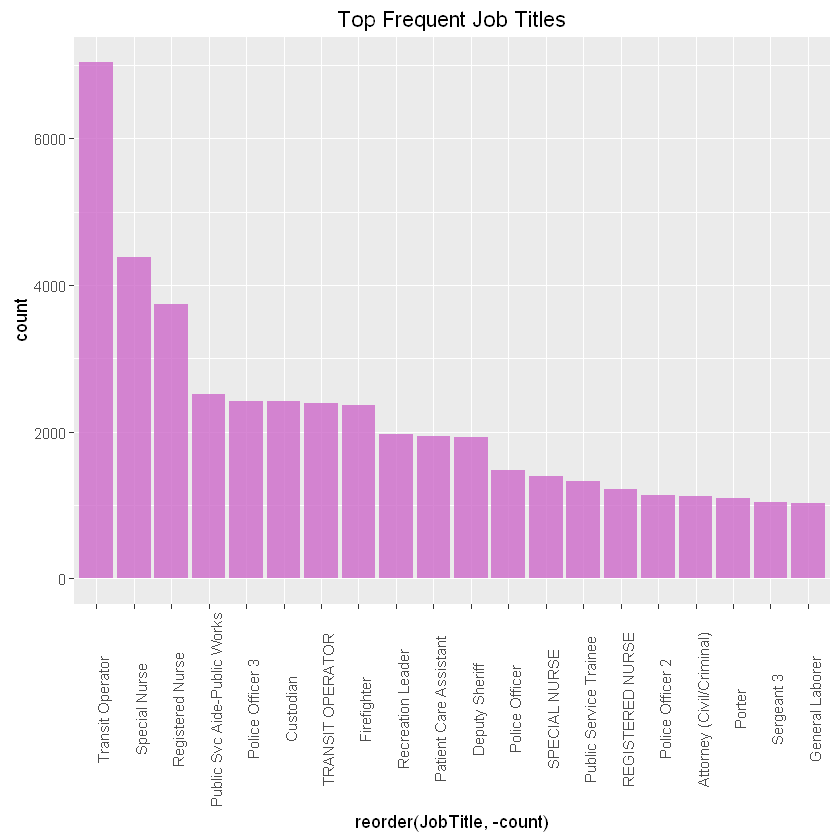

In [70]:
jobTitleCount <- salaries[salaries$JobTitle!="Not provided",] %>% group_by(JobTitle) %>% 
  summarize(count=n()) %>% arrange(desc(count))
head(jobTitleCount, n=10)
ggplot(jobTitleCount[1:20,], aes(x=reorder(JobTitle,-count), y=count)) + geom_bar(fill="orchid3", alpha=0.8, stat="identity") +
  labs(title="Top Frequent Job Titles") + theme(axis.text.x = element_text(angle=90))

The job titles with top average total pay including benefits:

,JobTitle,average
1,Chief Investment Officer,436224.4
2,Chief of Police,411732.3
3,"Chief, Fire Department",408865.3
4,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.3
5,"Gen Mgr, Public Trnsp Dept",380696.4
6,"Dep Dir for Investments, Ret",355731.3
7,Mayor,354212.9
8,"Adm, SFGH Medical Center",347079.7
9,Controller,343061.1
10,Asst Chf of Dept (Fire Dept),342597.6


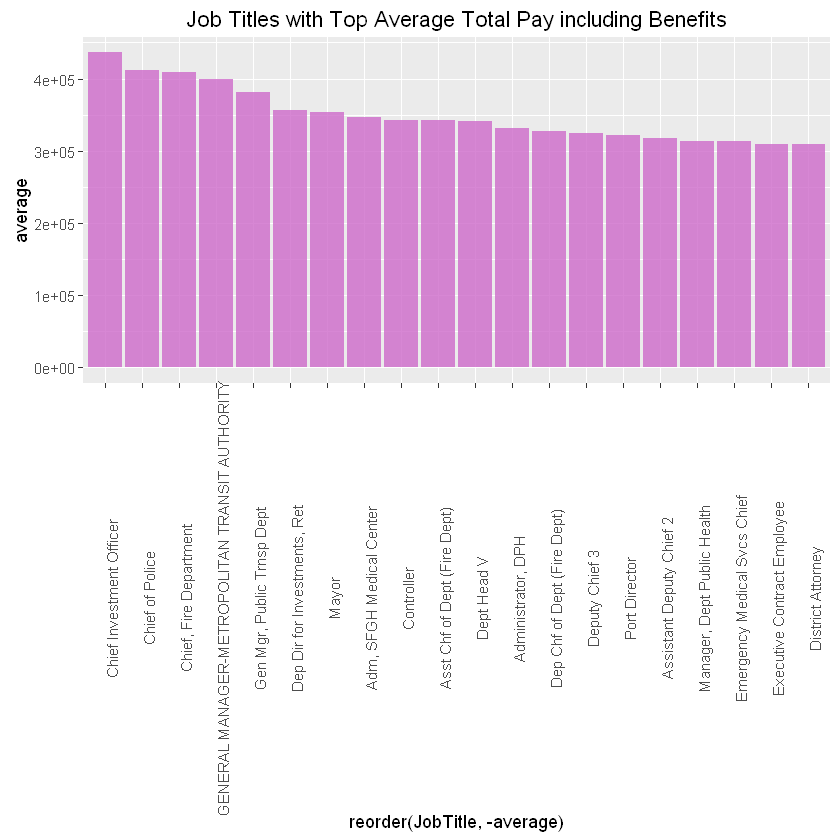

In [71]:
jobTitlePay <- salaries[salaries$JobTitle!="Not provided",] %>% group_by(JobTitle) %>% 
  summarize(average = mean(TotalPayBenefits)) %>% arrange(desc(average))
head(jobTitlePay, n=10)
ggplot(jobTitlePay[1:20,], aes(x=reorder(JobTitle,-average), y=average)) + geom_bar(fill="orchid3", alpha=0.8, stat="identity") +
  labs(title="Job Titles with Top Average Total Pay including Benefits") + theme(axis.text.x = element_text(angle=90))

The job titles with top average benefits:

,JobTitle,average
1,Chief Investment Officer,96570.66
2,"Gen Mgr, Public Trnsp Dept",82927.03
3,"Chief, Fire Department",82893.64
4,Chief of Police,82548.62
5,Mayor,78360.38
6,Controller,78310.39
7,"Dep Dir for Investments, Ret",77138.71
8,"Adm, SFGH Medical Center",77032.26
9,Dept Head V,75898.81
10,"Administrator, DPH",74813.57


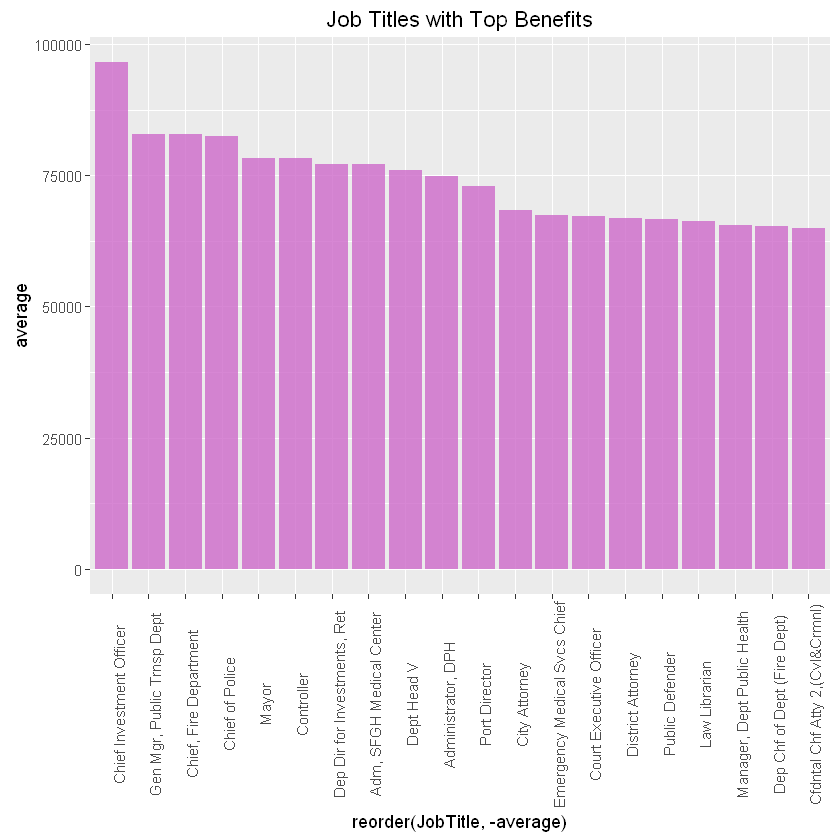

In [72]:
jobTitleBenefits <- salaries[(salaries$JobTitle!="Not provided" & salaries$Year!=2011),] %>% 
  group_by(JobTitle) %>% summarize(average = mean(Benefits)) %>% arrange(desc(average))
head(jobTitleBenefits, n=10)
ggplot(jobTitleBenefits[1:20,], aes(x=reorder(JobTitle,-average), y=average)) + 
  geom_bar(fill="orchid3", alpha=0.8, stat="identity") +
  labs(title="Job Titles with Top Benefits") + 
  theme(axis.text.x = element_text(angle=90))

--------------------------------------------------------------------------------------------------------------------------------

Data source: [Kaggle Data Set: SF Salaries](https://www.kaggle.com/kaggle/sf-salaries)